# 1. 환경 설정

In [1]:
# 라이브러리 설정
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Reshape

# 랜덤 시드 고정
SEED=12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)  

# 2. 데이터셋 준비

In [2]:
# 케라스에서 불러오기
from tensorflow.keras import datasets
fashion_mnist = datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# 피처 스케일링
X_train = X_train / 255.
X_test = X_test / 255.

# 차원 추가
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


# 3. 오토 인코더

In [8]:
# 오토 인코더 모델 정의 
def Autoencoder():

    model = Sequential()

    # Encoder 부분
    model.add(Conv2D(filters=16, kernel_size=(3, 3), 
                     activation='relu', input_shape=[28, 28, 1]))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu')) 

    # Decoder 부분
    model.add(Dense(units=28*28, activation='sigmoid'))   
    model.add(Reshape((28, 28)))     

    # Compile 
    model.compile(optimizer='adam', 
                  loss='mean_squared_error')

    return model  

ae_model = Autoencoder()
ae_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                173120    
_________________________________________________________________
dense_3 (Dense)              (None, 784)               50960     
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28)            0         
Total params: 224,240
Trainable params: 224,240
Non-trainable params: 0
________________________________________________

# 4. 이미지 복원

In [7]:
history = ae_model.fit(X_train, X_train, batch_size=64, epochs=20,
                        validation_data=(X_test, X_test),
                        verbose=0)

ae_images = ae_model.predict(X_test)
ae_images.shape

(10000, 28, 28)

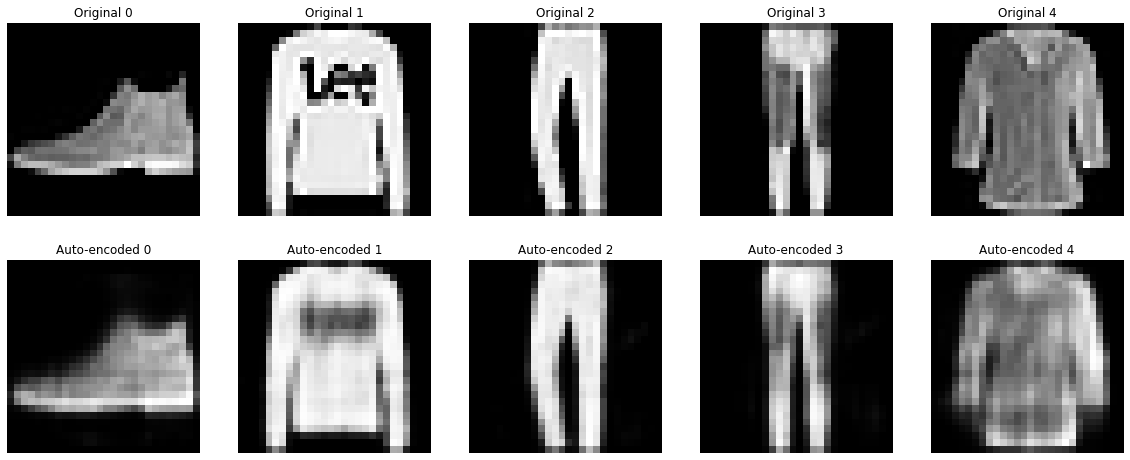

In [23]:
num = 5
plt.figure(figsize=(20, 8))

for i in range(num):

    # 원본 이미지
    ax = plt.subplot(2, num, i + 1)
    plt.imshow(X_test[i].reshape((28, 28)), cmap='gray')
    plt.title("Original %s" % str(i))
    plt.axis('off')

    # 복원 이미지
    ax = plt.subplot(2, num, i + num + 1)
    plt.imshow(ae_images[i], cmap='gray')
    plt.title("Auto-encoded %s" % str(i))
    plt.axis('off')

plt.show()